<a href="https://colab.research.google.com/github/Rohanjos97/data-mining-asignments/blob/IPL_dataset/IT496_Introduction_to%20Data_Mining%20_Lab%20Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Analysis

## 1. (T0) Explore the dataset assigned to your team and provide:




In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# read the csv data
df= pd.read_csv("IPL Ball-by-Ball 2008-2020 - IPL Ball-by-Ball 2008-2020.csv")

# getting outline of the dataset
df.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


### a) Summary of the Dataset 
Includes information about columns, attribute types, null values(if any), and summary of each attribute.

#### By looking at every column of the given dataset(IPL Ball-by-Ball 2008-2020), we can clearly understand the data above and summarize it as shown below

##### The dataset consists of 18 columns which describes following properties
										
- id: The match ids to uniquely identify each match.

- inning: The division of a match into two parts, during which one team takes its turn to bat/ball.

- over: Describes the current over being dealth.

- ball: The ball no. of the current over.

- batsman: The player who is currently batting.

- non_striker: The non-batting player who is on the opposing crease.

- bowler: The player who is currently bowling.

- batsman_runs: Run taken by batsman in that particular ball.

- extra_runs: The run(s) scored by or awarded to the batting team which is not credited to any individual batsman.

- total_runs: Total runs scored in a ball, i.e, batsman_runs + extra_runs.

- non_boundary: To indicate if a boundary occured in the ball.

- is_wicket: Indicates if the wicket was taken during that ball.

- dismissal_kind: Type of dismissal that dismissed the batsman.

- player_dismissed: The player who is dismissed.

- fielder: The non-bowler player who dismissed the batsman.

- extras_type: Type of extra runs that was awarded.

- batting_team: The team who is currently batting. 

- bowling_team: The team who is currently bowling. 

#### Lets have a look into different attributes of the given dataset

- dtypes: Datatype of each column.
- size: Displays the number of tuples in the dataset.
- shape: Displays the total number of rows and columns for a particular dataframe.
- empty: Checks whether the dataframe is empty or not.
- isnull: Displays True for every null value, and false otherwise.


In [ ]:
# overview of given dataset - a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [20]:
# Range Index: range of tuples  
# Index: name of each column
df.axes

[RangeIndex(start=0, stop=193468, step=1),
 Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
        'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
        'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
        'batting_team', 'bowling_team'],
       dtype='object')]

In [21]:
# Datatype of every column 
df.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [17]:
# Displays the number of tuples in the dataset
df.size

3482424

In [ ]:
# Displays the total number of rows and columns for a particular dataframe
df.shape

(193468, 18)

In [ ]:
# Checks whether the dataframe is empty or not
df.empty

False

In [19]:
# Get a count of null values present in the dataframe
df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

### b) Plots (graphs, histograms, pie charts) summarizing insights about the dataset.

## 2. (T0) List data preprocessing, and normalization/standardization techniques that you think should be the most suitable to your dataset.

#### During our investigation, we noted following observations:

1. few teams have same name but slightly modified details, eg "Rising Pune Supergiants" and "Rising Pune Supergiant" (Notice the 's' at the end of second team name's which is missing in the latter one).

In [30]:
# Since batting_team have non-null values let us check the teams mentioned in batting_team.
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

 2. The 'bowling_team' attribute have some null values(0.001%) that needs to be taken care of.

 3. For approx. 183973 out of 193468 entries(95.09%), the data for dismissal_kind, player_dismissed, fielder, extras_type is missing(NULL/empty).

In [35]:
null_values = df.isnull().sum()
print(null_values)

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      117398
player_dismissed    117398
fielder             119131
extras_type         116845
batting_team             0
bowling_team             0
dtype: int64


### Data Pre-Processing and Cleaning

#### Out of the 4 major preprocessing techniques, we have used following techniques to make our data usable:

##### 1. **Data Cleaning**

We have used **data cleaning to remove inconsistencies** in the batting_team column. We can do this process manually because the team names does not contain a large amount of data.

###### **1**: 'Delhi Capitals' and 'Delhi Daredevils' is the same team since both of them represent Delhi.

In [36]:
df =df.replace(['Delhi Daredevils'],'Delhi Capitals')
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Delhi Capitals'], dtype=object)

**2:** For the missing values in 'player_dismissed' and 'dismissal_kind', we will use the **global constant** "NA" value as "Not Out" in our case. We could have considered replacing it with 0, but the data is already being stored as string datatype. So, to make the data more readable, we are not using 0 to indicate 'Not Out' so as to increase the readability for users.

In [40]:
df['dismissal_kind'].fillna(value ="Not Out",inplace=True)
df['player_dismissed'].fillna(value ="Not Out",inplace=True)

##### 2. **Data Reduction**

###### **1:** Using numerosity Reduction to remove the old teams like 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors' , 'Rising Pune Supergiants'.
We know that 'Rising Pune Supergiants' played only for 1 season; other teams such as 'Pune warriors', 'Deccan Chargers' do not play anymore. **We do not have sufficient data about these teams to compare with other teams who have been in the league for a longer period of time**.

In [41]:
required_team=['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
        'Gujarat Lions']

# extracting only the required teams according to pre-processed data
df = df[(df['batting_team'].isin(required_team)) & (df['bowling_team'].isin(required_team))]

###### **2:** On removing the old teams & teams that do not play anymore, it also solved our problem of null value present in bowling team

In [42]:
# lets analyse the percentage of the values that are empty
df.isnull().mean()*100

id                   0.000000
inning               0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
non_boundary         0.000000
is_wicket            0.000000
dismissal_kind       0.000000
player_dismissed     0.000000
fielder             96.553038
extras_type         94.700285
batting_team         0.000000
bowling_team         0.000000
dtype: float64

**3:** Using the principles of **dimensionality reduction**, we are droping columns "extras_type" and "fielder" as it will not affect our analysis. 

In [43]:
df.drop(['extras_type','fielder'],axis=1,inplace=True)

After completing the Data Pre-Processing tasks, our data looks like this

In [44]:
df.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
batting_team        0
bowling_team        0
dtype: int64

## Statistical Analysis

#### 1: Top 10 batsmen based on strike rate. [Strike Rate = (total run scored by batsman/ total balls faced by batsman) * 100]

In [95]:
total_runs = df.groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs': 'total_runs'})
balls_faced = df.groupby('batsman')['ball'].count().reset_index().rename(columns={'ball': 'total_balls_faced'})

# merging the above two table
strike_rate_data = pd.merge(total_runs, balls_faced, how='inner', on='batsman')

# adding a new column, strike_rate, to our new dataframe
strike_rate_data['strike_rate'] = strike_rate_data['total_runs']/strike_rate_data['total_balls_faced']*100
strike_rate_data.sort_values(by='total_runs', ascending=False).head(10).reset_index().drop('index',axis=1)

,batsman,total_runs,total_balls_faced,strike_rate
0,V Kohli,4361,3474,125.532527
1,SK Raina,4254,3164,134.450063
2,CH Gayle,3887,2810,138.327402
3,DA Warner,3457,2410,143.443983
4,S Dhawan,3368,2709,124.326320
5,AB de Villiers,3355,2171,154.537080
6,MS Dhoni,3175,2333,136.090870
7,SR Watson,3122,2366,131.952663
8,RG Sharma,3056,2387,128.026812
9,AT Rayudu,2893,2338,123.738238


In [96]:
# Checking correlation in strike rate table
strike_rate_data.corr()

,total_runs,total_balls_faced,strike_rate
total_runs,1.000000,0.996108,0.298363
total_balls_faced,0.996108,1.000000,0.285447
strike_rate,0.298363,0.285447,1.000000


##### obvious correlation:
- total_runs have correlation of **0.996** with total_balls_faced. With increase in no. of balls faced by batsman, there is an increase in batsman_runs.

#### 2: Top 10 batsmen based on the total no. of 6's scored

In [217]:
six = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().rename(columns={'batsman_runs': 'no. of 6\'s'})

# Comparing total runs scored with total 6's score
six['total_6_score'] = six['no. of 6\'s']*6
comparison_data_on_6 = pd.merge(six, strike_rate_data, how='inner', on='batsman')

comparison_data_on_6.sort_values(by='no. of 6\'s',ascending =False).head(10).reset_index().drop('index',axis=1)

,batsman,no. of 6's,total_6_score,total_runs,total_balls_faced,strike_rate
0,CH Gayle,273,1638,3887,2810,138.327402
1,AB de Villiers,179,1074,3355,2171,154.537080
2,KA Pollard,169,1014,2536,1735,146.167147
3,SK Raina,155,930,4254,3164,134.450063
4,MS Dhoni,151,906,3175,2333,136.090870
5,V Kohli,150,900,4361,3474,125.532527
6,SR Watson,146,876,3122,2366,131.952663
7,DA Warner,127,762,3457,2410,143.443983
8,RG Sharma,119,714,3056,2387,128.026812
9,AD Russell,113,678,1335,764,174.738220


In [137]:
comparison_data_on_6.corr()

,no. of 6's,total_6_score,total_runs,total_balls_faced,strike_rate
no. of 6's,1.000000,1.000000,0.926269,0.898587,0.308374
total_6_score,1.000000,1.000000,0.926269,0.898587,0.308374
total_runs,0.926269,0.926269,1.000000,0.996108,0.298363
total_balls_faced,0.898587,0.898587,0.996108,1.000000,0.285447
strike_rate,0.308374,0.308374,0.298363,0.285447,1.000000


obvious correlation
1. no. of 6's have correlation of **0.8985** with total balls faced by batsman. As the batsman faces more balls, he is more comfortable in hitting 6's.

2. no. of 6's have correlation of **0.9262** with total runs scored by batsman. Meaning, with the increase in 6's, total runs scored by the player also increases. Hence, high risk yields higher rewards.

#### 3: Top 10 batsmen based on the total no. of 4's scored

In [218]:
four = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().rename(columns={'batsman_runs': 'no. of 4\'s'})

# Comparing total runs scored with total 6's score
four['total_4_score'] = four['no. of 4\'s']*4
comparison_data_on_4 = pd.merge(four, strike_rate_data, how='inner', on='batsman')

comparison_data_on_4.sort_values(by='no. of 4\'s',ascending =False).head(10).reset_index().drop('index',axis=1)

,batsman,no. of 4's,total_4_score,total_runs,total_balls_faced,strike_rate
0,SK Raina,402,1608,4254,3164,134.450063
1,S Dhawan,395,1580,3368,2709,124.326320
2,V Kohli,369,1476,4361,3474,125.532527
3,DA Warner,330,1320,3457,2410,143.443983
4,CH Gayle,318,1272,3887,2810,138.327402
5,SR Watson,314,1256,3122,2366,131.952663
6,RV Uthappa,293,1172,2883,2225,129.573034
7,RG Sharma,284,1136,3056,2387,128.026812
8,PA Patel,267,1068,2045,1694,120.720189
9,AB de Villiers,265,1060,3355,2171,154.537080


In [216]:
comparison_data_on_4.corr()

,no. of 4's,total_4_score,total_runs,total_balls_faced,strike_rate
no. of 4's,1.000000,1.000000,0.984029,0.987080,0.285576
total_4_score,1.000000,1.000000,0.984029,0.987080,0.285576
total_runs,0.984029,0.984029,1.000000,0.996108,0.298363
total_balls_faced,0.987080,0.987080,0.996108,1.000000,0.285447
strike_rate,0.285576,0.285576,0.298363,0.285447,1.000000


obvious correlation
1. no. of 4's have correlation of **0.9870** with total balls faced by batsman. As the batsman faces more balls, he is more comfortable in hitting 4's.

2. no. of 4's have correlation of **0.9842** with total runs scored by batsman. Meaning, with the increase in 4's, total runs scored by the player also increases. Hence, high risk yields higher rewards.

4: Top 10 bowlers based on wickets taken

In [64]:
wicket = df.groupby(['bowler'])['is_wicket'].sum().reset_index()
sortedbowl_players = wicket.sort_values(by ='is_wicket',ascending =False).head(10).reset_index().drop('index',axis=1)
sortedbowl_players

,bowler,is_wicket
0,DJ Bravo,144
1,SL Malinga,131
2,PP Chawla,129
3,Harbhajan Singh,119
4,B Kumar,112
5,YS Chahal,110
6,SP Narine,109
7,R Ashwin,106
8,JJ Bumrah,103
9,Sandeep Sharma,96


In [ ]:
sortedbowl_players.corr()

,is_wicket,inning,over,batsman_runs
is_wicket,1.000000,0.533664,0.792107,0.668513
inning,0.533664,1.000000,0.536659,0.732510
over,0.792107,0.536659,1.000000,0.711549
batsman_runs,0.668513,0.732510,0.711549,1.000000


#### 4: Top 10 bowlers based on most innings played

In [248]:
innings = df.groupby('bowler')[['id', 'is_wicket','batsman_runs']].agg(innings=('id', 'nunique'), wickets_taken=('is_wicket', 'sum'), runs_concieved=('batsman_runs', 'sum'))

innings.sort_values(by='innings', ascending=False).head(10).reset_index()

,bowler,innings,wickets_taken,runs_concieved
0,PP Chawla,125,129,3256
1,Harbhajan Singh,121,119,3039
2,RA Jadeja,115,89,2564
3,R Ashwin,109,106,2698
4,DJ Bravo,108,144,2941
5,SP Narine,97,109,2586
6,SL Malinga,93,131,2596
7,YS Chahal,86,110,2352
8,P Kumar,86,70,2165
9,AR Patel,83,74,2072


In [249]:
wicket.corr()

,innings,wickets_taken,runs_concieved
innings,1.000000,0.953992,0.985580
wickets_taken,0.953992,1.000000,0.974978
runs_concieved,0.985580,0.974978,1.000000


interesting correlations:

1. wickets_taken have correlation of **0.975** with runs_concieved. In order to setup more wickets, the bowler have concieved more runs in the process. High Risk, high rewards.

#### 5: Top 10 bowlers based on economy **[REVISIT]**

In [254]:
overs = df.groupby('bowler')[['id','batsman_runs', 'is_wicket','over']].agg(innings=('id', 'nunique'), runs_concieved=('batsman_runs', 'sum'), wicket_taken=('is_wicket', 'sum'), over=('over','count'))
overs['over'] = overs['over']/6

economy = overs
economy['economy'] = (economy['runs_concieved']/(economy['over']))

economy.sort_values(by ='runs_concieved',ascending =False).head(10).reset_index()

,bowler,innings,runs_concieved,wicket_taken,over,economy
0,PP Chawla,125,3256,129,419.333333,7.764706
1,Harbhajan Singh,121,3039,119,442.666667,6.865211
2,DJ Bravo,108,2941,144,381.500000,7.709043
3,R Ashwin,109,2698,106,400.500000,6.736579
4,SL Malinga,93,2596,131,380.833333,6.816630
5,SP Narine,97,2586,109,385.000000,6.716883
6,RA Jadeja,115,2564,89,336.000000,7.630952
7,YS Chahal,86,2352,110,324.833333,7.240636
8,Sandeep Sharma,78,2231,96,301.500000,7.399668
9,P Kumar,86,2165,70,311.666667,6.946524


In [255]:
economy.corr()

,innings,runs_concieved,wicket_taken,over,economy
innings,1.000000,0.985580,0.953992,0.984626,-0.205223
runs_concieved,0.985580,1.000000,0.974978,0.995042,-0.186226
wicket_taken,0.953992,0.974978,1.000000,0.977386,-0.214022
over,0.984626,0.995042,0.977386,1.000000,-0.214450
economy,-0.205223,-0.186226,-0.214022,-0.214450,1.000000


##### Correlation:
- As the over increase we can see the correlation of getting a wicket.
- Moreover , As the over increase there are high chances that the economy will decrease 

#### Winning team

First, we will calclulate the total runs scored by the teams in each matches played against each other. But, if we look closely, the data in first 2 rows is having same ids but the position of 'batting_team' and 'bowling_team' is interchanged.

In [ ]:
total_runs_in_match = df.groupby(['id','batting_team','bowling_team']).sum()
total_runs_in_match = total_runs_in_match.drop(labels=['inning','over'],axis=1).reset_index()
total_runs_in_match

,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,448,205,17,222,0,3
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,383,63,19,82,0,10
2,335983,Chennai Super Kings,Kings XI Punjab,449,234,6,240,0,5
3,335983,Kings XI Punjab,Chennai Super Kings,449,196,11,207,0,4
4,335984,Delhi Capitals,Rajasthan Royals,358,122,10,132,0,1
...,...,...,...,...,...,...,...,...,...
1307,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,445,122,10,132,0,4
1308,1237180,Delhi Capitals,Sunrisers Hyderabad,455,181,8,189,1,3
1309,1237180,Sunrisers Hyderabad,Delhi Capitals,456,166,6,172,0,8
1310,1237181,Delhi Capitals,Mumbai Indians,441,152,4,156,0,7


Now, to make the winner team's calculation easy, let's split the data of same ids into two different dataframes so that we can directly compare the 'total_runs' scored by each team. Here we are spliting the tables by steps of 2 because the data is arranged in the increasing order of id.

In [ ]:
df1=pd.DataFrame(total_runs_in_match[::2]).reset_index()
df2=pd.DataFrame(total_runs_in_match[1::2]).reset_index()


Now we can directly comare the two tables 'total_runs' and decide which team won the match. After storing the data, we can again merge the tables again.

In [ ]:

length = len(df1)

for itr in range (0, length):
    if(df1.loc[itr, 'id'] == df2.loc[itr, 'id']):
        if(df1.loc[itr, 'total_runs'] > df2.loc[itr, 'total_runs']):
            winner = df1.loc[itr, 'batting_team']
            df1.at[itr, 'winner'] = winner
            df2.at[itr, 'winner'] = winner

        elif(df1.loc[itr, 'total_runs'] < df2.loc[itr, 'total_runs']):
            winner = df2.loc[itr, 'batting_team']
            df2.at[itr, 'winner'] = winner
            df1.at[itr, 'winner'] = winner

        else:
            df1.at[itr, 'winner'] = 'Draw'
            df2.at[itr, 'winner'] = 'Draw'

# merging the two tables again
winner_team_data = pd.merge(df1, df2, how= 'outer')
winner_team_data['won_by']=df1['total_runs']-df2['total_runs']
winner_team_data.dropna(inplace=True)
winner_team_data.isna().sum()
winner_team_data

,index,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,winner,won_by
0,0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,448,205,17,222,0,3,Kolkata Knight Riders,140.0
1,2,335983,Chennai Super Kings,Kings XI Punjab,449,234,6,240,0,5,Chennai Super Kings,33.0
2,4,335984,Delhi Capitals,Rajasthan Royals,358,122,10,132,0,1,Delhi Capitals,3.0
3,6,335985,Mumbai Indians,Royal Challengers Bangalore,441,154,11,165,0,7,Royal Challengers Bangalore,-1.0
4,8,335987,Kings XI Punjab,Rajasthan Royals,434,162,4,166,0,8,Rajasthan Royals,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
651,1302,1216547,Mumbai Indians,Royal Challengers Bangalore,456,196,5,201,0,5,Draw,0.0
652,1304,1237177,Delhi Capitals,Mumbai Indians,465,137,6,143,0,8,Mumbai Indians,-57.0
653,1306,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,449,127,4,131,0,7,Sunrisers Hyderabad,-1.0
654,1308,1237180,Delhi Capitals,Sunrisers Hyderabad,455,181,8,189,1,3,Delhi Capitals,17.0


In [ ]:

length = len(df1)

for itr in range (0, length):
    if(df1.loc[itr, 'id'] == df2.loc[itr, 'id']):
        if(df1.loc[itr, 'batsman_runs'] > df2.loc[itr, 'batsman_runs']):
            winner = df1.loc[itr, 'batting_team']
            df1.at[itr, 'winner'] = winner
            df2.at[itr, 'winner'] = winner

        elif(df1.loc[itr, 'batsman_runs'] < df2.loc[itr, 'batsman_runs']):
            winner = df2.loc[itr, 'batting_team']
            df2.at[itr, 'winner'] = winner
            df1.at[itr, 'winner'] = winner

        else:
            df1.at[itr, 'winner'] = 'Draw'
            df2.at[itr, 'winner'] = 'Draw'

# merging the two tables again
winner_team_data1 = pd.merge(df1, df2, how= 'outer')
winner_team_data1

,index,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,winner
0,0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,448,205,17,222,0,3,Kolkata Knight Riders
1,2,335983,Chennai Super Kings,Kings XI Punjab,449,234,6,240,0,5,Chennai Super Kings
2,4,335984,Delhi Capitals,Rajasthan Royals,358,122,10,132,0,1,Draw
3,6,335985,Mumbai Indians,Royal Challengers Bangalore,441,154,11,165,0,7,Royal Challengers Bangalore
4,8,335987,Kings XI Punjab,Rajasthan Royals,434,162,4,166,0,8,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...
1307,1303,1216547,Royal Challengers Bangalore,Mumbai Indians,441,191,10,201,0,3,Mumbai Indians
1308,1305,1237177,Mumbai Indians,Delhi Capitals,427,196,4,200,0,5,Mumbai Indians
1309,1307,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,445,122,10,132,0,4,Royal Challengers Bangalore
1310,1309,1237180,Sunrisers Hyderabad,Delhi Capitals,456,166,6,172,0,8,Delhi Capitals


In [ ]:
winner_team_data['winner'].equals(winner_team_data1['winner'])

False

# STARTING NEW:


<AxesSubplot:xlabel='inning', ylabel='id'>

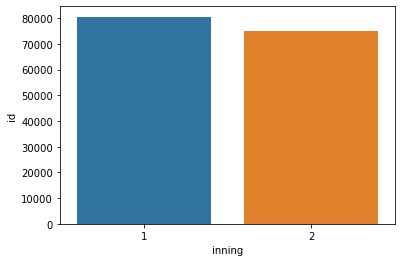

In [ ]:
#INNING:
INNINGS=df.groupby('inning').count()['id']
inning=INNINGS.to_frame().reset_index()
inning
sns.barplot(x='inning',
    y='id', data=inning)

In [ ]:
#overs:
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
#highest ball thrown in an over
HIGHEST_BALL_IN_AN_OVER=df.groupby('ball').nunique().reset_index()
HIGHEST_BALL_IN_AN_OVER['ball']

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: ball, dtype: int64

In [ ]:
#wicket_type  
dismissal=df.groupby('dismissal_kind').count().reset_index()
dismissal=dismissal.loc[1:10]

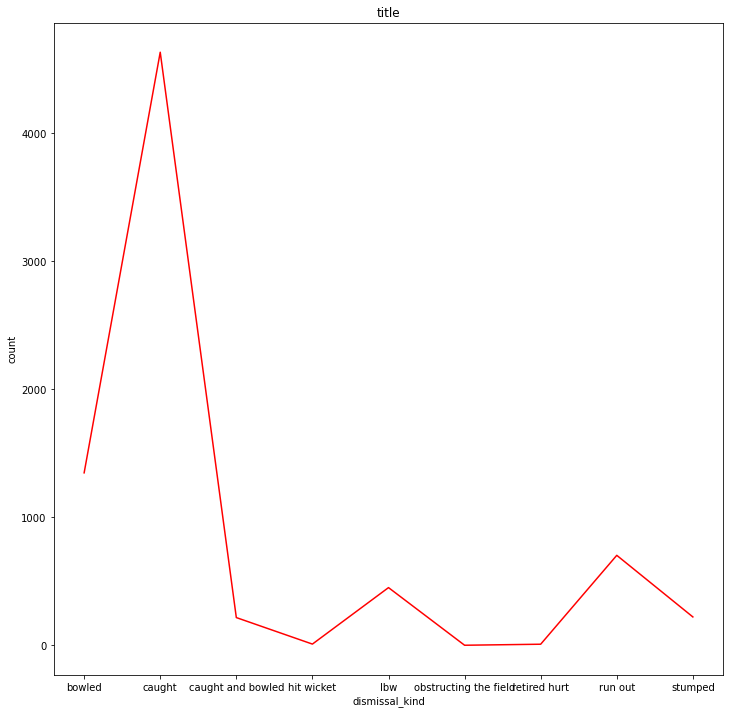

In [ ]:

fig, axes = plt.subplots(figsize=(12,12))
axes.plot(dismissal['dismissal_kind'],dismissal['id'],'r')
axes.set_xlabel('dismissal_kind')
axes.set_ylabel('count')
axes.set_title('title');

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report
interval_cols =['id', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

In [ ]:
phik_overview

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,batting_team,bowling_team
id,1.000000,0.000000,0.000000,0.000000,0.808945,0.807997,0.856478,0.035541,0.018171,0.051384,0.004910,0.003339,0.015479,0.233487,0.296292,0.297121
inning,0.000000,1.000000,0.085324,0.000000,0.272120,0.281362,0.263267,0.008600,0.000000,0.013474,0.000000,0.000000,0.009230,0.000000,0.065995,0.071799
over,0.000000,0.085324,1.000000,0.031083,0.587532,0.606709,0.566379,0.190158,0.043572,0.182908,0.000000,0.117722,0.112237,0.184679,0.000000,0.000000
ball,0.000000,0.000000,0.031083,1.000000,0.000000,0.000000,0.000000,0.010569,0.010503,0.009369,0.000000,0.005902,0.008978,0.068042,0.000000,0.008676
batsman,0.808945,0.272120,0.587532,0.000000,1.000000,0.993795,0.904174,0.171329,0.037378,0.160541,0.000000,0.108359,0.214919,0.996543,0.968566,0.555036
non_striker,0.807997,0.281362,0.606709,0.000000,0.993795,1.000000,0.908406,0.137807,0.000000,0.194673,0.038318,0.085953,0.232449,0.898185,0.968615,0.566924
bowler,0.856478,0.263267,0.566379,0.000000,0.904174,0.908406,1.000000,0.179667,0.080010,0.166198,0.000000,0.031495,0.052635,0.149573,0.540441,0.971282
batsman_runs,0.035541,0.008600,0.190158,0.010569,0.171329,0.137807,0.179667,1.000000,0.304589,0.954430,0.016460,0.246082,0.212957,0.241804,0.024422,0.018851
extra_runs,0.018171,0.000000,0.043572,0.010503,0.037378,0.000000,0.080010,0.304589,1.000000,0.602591,0.000000,0.045347,0.039755,0.000000,0.001454,0.015507
total_runs,0.051384,0.013474,0.182908,0.009369,0.160541,0.194673,0.166198,0.954430,0.602591,1.000000,0.023066,0.389617,0.231222,0.263205,0.023766,0.018184


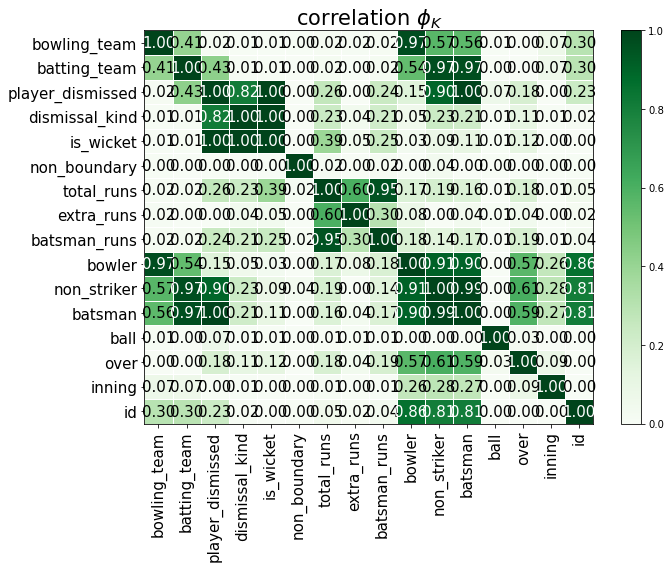

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()